# Survey Model


This notebook summarizes the steps in the development process for our survey model. We have additional code/deep-dives within the [sandbox](https://github.com/orenscarmeli/capstone210-ppd-carmeli_chari_hand_lee/tree/main/modeling/survey_model_sandbox) folder. We shortened that code & summarized learnings into this file.

### The data

The model leverages a [public dataset](https://wwwn.cdc.gov/nchs/nhanes/default.aspx) from the National Health and Nutrition Examination Survey (NHANES). NHANES is a national survey that monitors the health and nutrional status of adults and children across the US. NHANES is run by the National Center for Health Statistics (NCHS). NCHS is part of centers for disease control and prevention (CDC) and is responsible for producing vital and health statistics for the nation. The public database contains data to 40+ surveys that were each conducted 12 times between 1999-2020. 

### Data Pipeline

We explored roughly half of the survey files available in the database. For our final model we are using 22 different survey files spanning years of 2013-2020. We created a [datapipeline](https://github.com/orenscarmeli/capstone210-ppd-carmeli_chari_hand_lee/blob/main/pipeline/cdc_agg_pipe.ipynb) which merges and cleans data from these files.

### Model Development Process

#### Model Objective

The objective of our model is to predict whether a survey respondent is depressed. Our project is oriented around predicting PPD. To frame the model towards PPD we are filtering the dataset to only include women that have been pregnant. Hence, we are making the assumption that if a previously pregnant woman is depressed they are suffering from PPD. There are limitations in this approach which we will disuss further. The specific outcome & input variables are listed below;
- The **outcome variable** is binary indicator variable called "MDD". The value is 1 if the individual has been diagnosed & is taking medication related to depression. 
- The **input variables** include 117 features across 7 themes; alcohol & smoking, medical history/conditions, hospitalization usage/access, lifestyle traits, socioeconomic traits, reproductive health, & demographic traits.

#### Guiding Principles

- Model interpretability: The model is meant to screen individuals with risk of depression. If the model is highly accurate, but acts as a black box it won't be very useful in further diagnosing. The respondent and medical practioner should understand what markers are used & how depressed individuals are identified. 
- Less features the better: The model will be surfaced through a front-end web application that requires an individual to answer the survey. The survey needs to be short enough where it is easy to answer. 
- Unethical biases: We need to ensure that the model is able to work effectively across all demographic segments. The key segments we will evaluate are; A) race & B) socioeconomic status.

#### 1) EDA

Summarize key insights from EDA identifying issues with data quality & features that are correlated to the prediction variable.

#### 2) Generate Baseline Models

We explored several options during the training phase in an effort to build the best model and better understand our target sample. We explored the following 6 classifiers for our model;
- Logistic Regression: XXX
- Random Forest: XXX
- Decision Tree: XXX
- K-Nearest Neighbor (KNN): XXX
- Naive Bayes: XXX
- Gradient Boosting Classifier: XXX


Evaluation criteria:
- Primary: Recall given core objective of “screening” & highlighting patients at risk.
- Secondary: F1 to balance precision

#### 3) Error Analysis

We first look at model performance at different groupings; 
- 1) Positive class (depressed_yes): using the evaluation criterion on the observations in the test set that are labelled as depressed (MDD=1). This is the key grouping as we ultimately want to ensure the screener properly flags those with risk.
- 2) Negative class (depressed_no): using the evaluation criterion on the observations in the test set that are labelled as non-depressed (MDD=0). 
- 3) macro average: The artithmetic mean of the evaluation criterion across classes. For example, if the recall of class 1 is 100 and recall of class 0 is 50, then the macro average is 75. 
- 4) weighted avgerage: Similar to macro average as it includes performance across all class, but weights it based on class representation. There are more respondents in the negative class, hence that class will have a larger weighting.

We will particularly focus on the performance of the positive class, hence are mostly optimizing improvements across posittive class & macro avg groupings. 

The objective of our error analysis is to understand features of the test set across false positives, false negatives, true positives, & true negatives. The main lever we will have for improving the model based on the error analysis will be feature selection & feature engineering.


#### 4) Feature Selection & Feature Engineering

The baseline model will use the 10 depression screener columns. Those columns are standard for screening depression, hence we figure is a reasonable place to start. Our process for feature selection & engineering will roughly follow the process below:

- 1) Feature selection based on domain knowledge & error analysis; 
 - Domain knowledge: we have identified 7 themes of features identified through a combination of research around common risk markers for depression in addition to our intuitive guess of which features might be predictive. 
 - Error analysis: Based on initial error analysis, we want to understand what are the values among the feature columns where the model is right vs wrong. To improve recall we will start by identifying other features that are correlated to the target column, but importantly, have high variance when existing feature columns may be misleading. For example, if the key column from the depression screener has a low value, but the individual is depressed we want to find candidate columns to supplement & act as a fall back.
- 2) Feature engineering to supplement existing features & enhance existing features. 
 - Supplement existing features: We will explore creating custom columns that take other features as inputs. For example, if an individual scored high across multiple depression screener columns we can create a new column as a flag to highlight that. In addition, we will compare whether there are non-linear relationships with variables & create features that are the square of a depression screener question for example.
 - Enhance existing features: We will explore binning continous columns that may have a strong correlation to the target, but are sparse. 

#### 5) Positive Class Imbalance

Positive class imbalance: Across our entire dataset ~4% of respondents have MDD=1. Among preganant woman, ~10% have MDD=1. We explored 3 stragies to account for this;
- SMOTE: XXX
- Test/Train Proportion: XXX
- Adding additional survey years: XXX

#### 6) Hyperparameter Tuning

Via gridsearch brute force

#### 7) Ensemble Methods

Explore using combination of multiple models in cases where some are less confident in prediction.

#### 8) Segmentation & Bias

Segmentation: Compare performance when across several groups; A) all respondents B) males only C) females only D) females that have been preganant only. This is used to understand potential differences in predicting depression among different audiences. We will also compare performance across subgroups within each of these. For example, measuring performance among previously pregnant females by race.

#### 9) Final Model

Pipeline for creating final model

#### 10) Discussion

Conclusions

Data Limitations

Future research

#### 11) Appendix

# TL'DR

Type the 3 key takeaways from the entire process here

# Setup

### Load Packages

In [54]:
# TODO: add annotations describing usage of different modules

from operator import mod
from os import getcwd
from os.path import exists, join

import joblib
from sklearn.datasets import fetch_california_housing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, KBinsDiscretizer
from sklearn.svm import SVR
import pandas as pd
import numpy as np
# from ydata_profiling import ProfileReport

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression, LinearRegression
import warnings
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import  GradientBoostingClassifier
# import xgboost as xgb
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

from sklearn.metrics import recall_score

from sklearn import tree
from sklearn.decomposition import PCA, SparsePCA

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import json
import pickle
from IPython.display import Image
import warnings

from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

import altair as alt
import random
import warnings

warnings.filterwarnings('ignore')

# set seaborn whitegrid theme
sns.set(style="whitegrid")

from sklearn.inspection import permutation_importance
from random import sample

### Load Data

In [2]:
cdc_survey = pd.read_csv('../data/cdc_nhanes_survey_responses_clean.csv')
print(cdc_survey.shape)

# filter to pregnant moms
cdc_survey_pmom = cdc_survey[cdc_survey['has_been_pregnant'] == 1].reset_index()
print(cdc_survey_pmom.shape)

(35706, 863)
(7741, 864)


### Candidate Features

Here we list out all candidate features for our model. We have separate lists containing each feature themes and one final list that includes all features.

In [3]:
# Depression screener
dep_screener_cols = [
    'little_interest_in_doing_things',
    'feeling_down_depressed_hopeless',
    'trouble_falling_or_staying_asleep',
    'feeling_tired_or_having_little_energy',
    'poor_appetitie_or_overeating',
    'feeling_bad_about_yourself',
    'trouble_concentrating',
    'moving_or_speaking_to_slowly_or_fast',
    'thoughts_you_would_be_better_off_dead',
    'difficult_doing_daytoday_tasks'
]

# Alcohol & smoking
alcohol_n_smoking_cols = [
    'has_smoked_tabacco_last_5days',
    'alcoholic_drinks_past_12mo', 
    'drank_alc',
    'alc_drinking_freq',
    'alc_per_day',
    'times_with_4or5_alc',
    'times_with_8plus_alc',
    'times_with_12plus_alc',
    '4plus_alc_daily',
    'days_4plus_drinks_occasion',
    'smoked_100_cigs',
    'currently_smoke'
]

#Medical Conditions 
med_condition_cols = [
    'chest_discomfort',
    'asthma',
    'anemia_treatment',
    'blood_transfusion',
    'arthritis',
    'heart_failure',
    'coronary_heart_disease',
    'angina_pectoris',
    'heart_attack',
    'stroke',
    'thyroid_issues',
    'respiratory_issues',
    'abdominal_pain',
    'gallstones',
    'gallbladder_surgery',
    'cancer',
    'dr_recommend_lose_weight',
    'dr_recommend_exercise',
    'dr_recommend_reduce_salt',
    'dr_recommend_reduce_fat',
    'currently_losing_weight',
    'currently_increase_exercise',
    'currently_reducing_salt',
    'currently_reducing_fat',
    'metal_objects',
    'has_diabetes',    
    #Blood Pressure & Cholesterol 
    'high_bp',
    'age_hypertension',
    'hypertension_prescription',
    'high_bp_prescription',
    'high_cholesterol',
    'cholesterol_prescription',
    # general health
    'has_overweight_diagnosis',   
    'height_in',
    'weight_lbs', 
    'general_health_condition',      
]

# diet, nutrition, & exercise 
lifestyle_cols = [
    # exercise/weight loss
    'vigorous_work',
    'walk_or_bicycle',
    'vigorous_recreation',
    'moderate_recreation',    
    'count_days_moderate_recreational_activity',   
    'count_minutes_moderate_recreational_activity',
    'count_minutes_moderate_sedentary_activity',    
    'count_lost_10plus_pounds',
    'has_tried_to_lose_weight_12mo', 
    'attempt_weight_loss_1yr',           
    # diet
    'how_healthy_is_your_diet',    
    'milk_consumption_freq',
    'govmnt_meal_delivery',
    'nonhomemade_meals',
    'fastfood_meals',
    'readytoeat_meals',
    'frozen_pizza'   
]

# Reproductive Health 
reproductive_health_cols = [
    'regular_periods',
    'age_last_period',
    'try_pregnancy_1yr',
    'see_dr_fertility',
    'pelvic_infection',
    'pregnant_now',
    'pregnancy_count',
    'diabetes_pregnancy',
    'delivery_count',
    'live_birth_count',
    'age_at_first_birth',
    'age_at_last_birth',
    'months_since_birth',
    'horomones_not_bc'
]

# hospital usage & access to care
hospital_utilization_n_access_cols = [
    'general_health',
    'regular_healthcare_place',
    'time_since_last_healthcare',
    'overnight_in_hospital',
    'seen_mental_health_professional',
    'count_days_seen_doctor_12mo',
    'duration_last_healthcare_visit',   
]

# socioeconomic status
socioeconomic_cols = [
    #Food Security
    'emergency_food_received',
    'food_stamps_used',      
    #Health Insurance
    'have_health_insurance',
    'have_private_insurance',
    'plan_cover_prescriptions',   
    #Income
    'family_poverty_level',
    'family_poverty_level_category',
    #Occupation
    'hours_worked',
    'over_35_hrs_worked',
    'work_schedule'    
]

demographic_cols = [
    'food_security_level_household',   
    'food_security_level_adult',    
    'monthly_poverty_index_category',
    'monthly_poverty_index',
    'count_hours_worked_last_week',
    'age_in_years',   
    'education_level',
    'is_usa_born',    
    'has_health_insurance',
    'has_health_insurance_gap'   
]

# combine all candidate features
candidate_features = dep_screener_cols + \
    alcohol_n_smoking_cols + \
    med_condition_cols + \
    hospital_utilization_n_access_cols + \
    lifestyle_cols + \
    socioeconomic_cols + \
    reproductive_health_cols + \
    demographic_cols


len(candidate_features)

116

### Functions

In [4]:
## ###############################################################################
## function to create test & train dataset

def get_model_data(original_df, 
                   columns, 
                   test_size_to_use=0.2,
                   drop_null_rows=False,
                   null_imputer_strategy='median', # mean, median, most_frequent
                   use_value_scaler=True,
                   use_smote=False,
                   return_indices=False):
    """
    Function to build feature & indicator matrices for both train & test.
    """
    
    # add target column (MDD)
    cols_to_use = columns.copy()
    cols_to_use.insert(0, 'MDD')
    #cols_to_use.insert(0, 'SEQN')
    
    df_to_use = original_df[cols_to_use]
    
    if drop_null_rows:
        df_to_use.dropna(inplace=True)
    
    # Create test & train data
    x = df_to_use.iloc[:,1:].values
    y = df_to_use['MDD'].values
    indices = np.arange(y.shape[0])
    
    if not drop_null_rows:
        # SimpleImputer() = fill in missing values
        # note imputer may drop columns if no values exist for it
        imputer = SimpleImputer(strategy=null_imputer_strategy)  
        x = imputer.fit_transform(x)

    # RobustScaler() = scale features to remove outliers
    if use_value_scaler:
        trans = RobustScaler()
        x = trans.fit_transform(x)

    x_train, x_test, y_train, y_test, idx_train, idx_test = train_test_split(
        x, 
        y, 
        indices,
        test_size=test_size_to_use, 
        random_state=42
    ) 
    
    # Technique to de-risk from positive class imbalance
    if use_smote:
        sm = SMOTE(random_state=42)
        x_train, y_train = sm.fit_resample(x_train, y_train)
    
    if return_indices:
        return x_train, x_test, y_train, y_test, idx_train, idx_test
    else:
        return x_train, x_test, y_train, y_test

## ###############################################################################
## Function to get performance across different models

def get_performance_df(label_actual, label_pred, model_name):
    """
    Function to calculate performance metrics for model.
    Includes precision, recal, F1, & support.
    """
    # create classification report
    result_table = classification_report(label_actual, label_pred, output_dict=True)
    result_table = pd.DataFrame.from_dict(result_table)

    # store for later
    accuracies = result_table['accuracy'][0]
    
    column_key = {
        '0':'Depressed (No)',
         '1':'Depressed (Yes)',
         'accuracy':'accuracy',
         'macro avg':'Macro Avg',
         'weighted avg':'Weighted Avg'
    }

    # rename grouping
    result_table.columns = [column_key.get(key) for key in result_table.columns]

    # create dataframe with 1 row per grouping
    result_table.drop(labels = 'accuracy', axis = 1, inplace=True)
    result_table = result_table.transpose()
    result_table['accuracy'] = [accuracies for i in range(result_table.shape[0])]
    result_table = result_table.reset_index()
    result_table.rename(columns = {'index':'grouping'},inplace=True)
    result_table['model'] = model_name
    result_table = result_table[['model','grouping','precision','recall','f1-score','support','accuracy']]
    return result_table

def generate_models(
    x_train, 
    y_train, 
    x_test, 
    y_test):
    """
    Function that trains and makes predictions using 5 of the classifiers went over during the class.
    Meant as a helper function for easier testing of different modeling pipelines.
    """

    # K-Nearest Neighbors
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    # test
    pred_labels_knn  = knn.predict(x_test)
    score_knn = get_performance_df(y_test, pred_labels_knn,'Knn')
    # train
    pred_labels_knn_train  = knn.predict(x_train)
    score_knn_train = get_performance_df(y_train, pred_labels_knn_train,'Knn')
    
    # Logistic Regression
    lm = LogisticRegression()
    lm.fit(x_train, y_train)
    # test 
    pred_labels_lr  = lm.predict(x_test)
    score_lr = get_performance_df(y_test, pred_labels_lr,'Logistic Regression')
    # train 
    pred_labels_lr_train  = lm.predict(x_train)
    score_lr_train = get_performance_df(y_train, pred_labels_lr_train,'Logistic Regression')    
        
    # Bernoulii Naive Bayes
    bnb = BernoulliNB()
    bnb.fit(x_train, y_train)
    # test 
    pred_labels_bnb  = bnb.predict(x_test)
    score_bnb = get_performance_df(y_test, pred_labels_bnb,'Bernoulli Naive Bayes')    
    # train 
    pred_labels_bnb_train  = bnb.predict(x_train)
    score_bnb_train = get_performance_df(y_train, pred_labels_bnb_train,'Bernoulli Naive Bayes')       
        
    # Gaussian Naive Bayes
    gnb = GaussianNB()
    gnb.fit(x_train, y_train)
    # test 
    pred_labels_gnb  = gnb.predict(x_test)
    score_gnb = get_performance_df(y_test, pred_labels_gnb,'Gaussian Naive Bayes')  
    # train 
    pred_labels_gnb_train  = gnb.predict(x_train)
    score_gnb_train = get_performance_df(y_train, pred_labels_gnb_train,'Gaussian Naive Bayes')         

    # Random Forest
    rf = RandomForestClassifier(random_state=0)
    rf.fit(x_train, y_train)
    # test     
    pred_labels_rf  = rf.predict(x_test)
    score_rf = get_performance_df(y_test, pred_labels_rf,'Random Forest')   
    # train 
    pred_labels_rf_train  = rf.predict(x_train)
    score_rf_train = get_performance_df(y_train, pred_labels_rf_train,'Random Forest')         
    
    #Decision Tree
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    # test
    pred_labels_dt = dt.predict(x_test)
    score_dt = get_performance_df(y_test, pred_labels_dt,'Decision Tree')
    # train 
    pred_labels_dt_train  = dt.predict(x_train)
    score_dt_train = get_performance_df(y_train, pred_labels_dt_train,'Decision Tree')          

    #Gradient Boosting Classifier
    gb = GradientBoostingClassifier()
    gb.fit(x_train, y_train)
    # test 
    pred_labels_gb = gb.predict(x_test)
    score_gb = get_performance_df(y_test, pred_labels_gb,'Gradient Boosting Classifier')
    # train 
    pred_labels_gb_train  = gb.predict(x_train)
    score_gb_train = get_performance_df(y_train, pred_labels_gb_train,'Gradient Boosting Classifier')     
    
    # make dataframe with scores (on test data)
    scores_test = pd.concat(
        [score_knn, 
         score_lr, 
         score_bnb, 
         score_gnb, 
         score_rf, 
         score_dt, 
         score_gb]
    )
    scores_test = scores_test.sort_values(by = 'recall', ascending=False)
    
    # make dataframe with scores (on train data)
    scores_train = pd.concat(
        [score_knn_train, 
         score_lr_train, 
         score_bnb_train, 
         score_gnb_train, 
         score_rf_train, 
         score_dt_train, 
         score_gb_train]
    )
    scores_train = scores_train.sort_values(by = 'recall', ascending=False)    
        
    # make dataframe with predictions
    predictions = pd.DataFrame({
        'actuals':y_test,
        'pred_knn':pred_labels_knn,
        'pred_logistic_regression':pred_labels_lr,
        'pred_bernoulli_naive_bayes':pred_labels_bnb,
        'pred_gaussian_naive_bayes':pred_labels_gnb,
        'pred_random_forest':pred_labels_rf,
        'pred_decision_tree':pred_labels_dt,
        'pred_gradient_boosting_classifier':pred_labels_gb
    })

    return scores_test, predictions, scores_train

## ###############################################################################
## Functions for Error analysis

def plot_confusion_matrix(y_test, pred_labels):
    """
    Function that displays a confusion matrix for provided true and predicted classes
    """
    #print(f'cover type 1 and type 2 total correct {np.sum(np.diag(metrics.confusion_matrix(y_test, pred_labels))[:2])}')

    cm = confusion_matrix(y_test, pred_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig, ax = plt.subplots(figsize=(5,5))
    disp = disp.plot(include_values=True, cmap='viridis', ax=ax, xticks_rotation='horizontal')    
    plt.grid(False)
    plt.show()
    return

def label_pred(row):
    """
    Function that labels prediction cases into TP, TN, FP, FN
    """
    if row['y_actual'] == row['y_pred']:
        if row['y_actual'] == 1:
            result = 'TP'
        else:
            result = 'TN'
    else: 
        if row['y_actual'] == 1:
            result = 'FN'
        else:
            result = 'FP'

    return result

def get_error_data(
    y_actuals, 
    y_predictions,
    x_test_matrix,
    x_test_columns):
    """
    Function that creates a clean dataset to perform error analysis on test observations.
    """    
    
    # create dataframe with actuals & predictions w/ labels
    prediction_labels = pd.DataFrame(columns = ['y_actual','y_pred'])
    prediction_labels['y_actual'] = y_actuals
    prediction_labels['y_pred'] = y_predictions
    prediction_labels['label'] = prediction_labels.apply(label_pred, axis = 1)

    # feature df 
    feature_df = pd.DataFrame(x_test_matrix, columns = x_test_columns)

    # combine into 1
    pred_data = pd.concat([prediction_labels, feature_df], axis = 1)
    
    return pred_data

def create_error_plots(
    prediction_data,
    columns_to_plot,
    show_bar_plot=True,
    show_density_plot=False):
    """
    Function that creates bi-variate plots comparing TP, TN, FP, FN for each desired feature column.
    """

    ### Bi-variate plots
    for column in columns_to_plot:
    
        if show_density_plot:
            ## Density plot
            sns.kdeplot(
                data=prediction_data, 
                x=column, 
                hue="label", 
                cut=0, 
                common_norm=False, 
                alpha=0.4
            )

        if show_bar_plot:
            ## barplot
            # create % of total column by group
            group_data = prediction_data.groupby(['label',column])['y_actual'].count().reset_index()
            group_data['Pct of Total'] = group_data['y_actual'] / group_data.groupby('label')['y_actual'].transform('sum')

            sns.catplot(
                data=group_data, 
                kind="bar",
                x=column, 
                y="Pct of Total", 
                hue="label",
                alpha = 0.8
            )

        plt.show()

# 1) Exploratory Data Analyais

We spent the first few weeks exploring our data. We have a folder of our EDA [here](https://github.com/orenscarmeli/capstone210-ppd-carmeli_chari_hand_lee/tree/main/eda), but we highlight the key findings in this section.

The key aspects we looked at include;
- Data coverage based on what % of values are null across each feature. Our classifiers do not allow null values to be used, hence we'll either need to drop null values or impute values for these.
- Feature correlation based on a features correlation to the target column (MDD). 
- Feature sparsity by measuring whether a variable has a large range of values versus a few discrete options. This will come into play when we explore feature engineering.

We first measured the % of observation that are within the positive class.

In [5]:
print(f"Across the entire dataset {round(cdc_survey['MDD'].mean()*100,2)}% of observations are within the positive class")
print(f"Among females that have been pregnant {round(cdc_survey_pmom['MDD'].mean()*100,2)}% of observations are within the positive class")

Across the entire dataset 4.23% of observations are within the positive class
Among females that have been pregnant 9.71% of observations are within the positive class


We defined a function to perform a univariate analysis per feature. This creates a dataframe that has 1 row per feature & stores key stats for it.

The primary columns include;
- **corr** = the pearson correlation between a feature & target (MDD)
- **corr_abs** = the absolute value of the corr column
- **unique_values** = # of discrete values within a features domain
- **pct_null** = % of values that are null

In addition, for every feature we calculate the % of observations where MDD=1 by each discrete value in its domain. We then compare the min, max, & std deviation across value averages. For example, feeling_down_depressed_hopeless has 4 values {0,1,2,3} per the chart below;

In [6]:
cdc_survey_pmom.groupby('feeling_down_depressed_hopeless') \
   .agg({'MDD':'mean', 'SEQN':'count'}) \
   .reset_index() \
   .rename(columns={'MDD':'pct_MDD','SEQN':'num_responses'})

,feeling_down_depressed_hopeless,pct_MDD,num_responses
0,0.0,0.050074,5432
1,1.0,0.175738,1525
2,2.0,0.225316,395
3,3.0,0.351097,319


Per the image above, the min and max are 0.05 & 0.35 respectively. We then calculate a value that is max_minus_min to see clearly how well this feature separates negative & postive class observations. We filter for values that have 30+ responses to reduce noise from sparse features.

These columns are plotted in the univariate analysis as;
- **min** = min pct_target across values with 30+ responses
- **max** = max pct_target across values with 30+ responses
- **std** = std deviation pct_target across values with 30+ responses
- **max_minus_min** = max - min columns.

In [7]:
def univariate_analysis(
    df_to_use = cdc_survey_pmom,
    columns = dep_screener_cols,
    target_col = 'MDD',
    show_plot=False):
    
    column_values = pd.DataFrame(columns = ['col_value','pct_target','num_responses','feature'])
    column_summary = pd.DataFrame(columns=['feature','corr','corr_abs','std','min','max','unique_values','target','max_minus_min'])

    # MDD coverage by feature
    for col in columns:

        # calc mean pct for target column by indicator variable
        univariate = df_to_use.groupby(col) \
               .agg({target_col:'mean', 'SEQN':'count'}) \
               .reset_index() \
               .rename(columns={col:'col_value',target_col:'pct_target','SEQN':'num_responses'})

        if show_plot:
            print(f"\n{col}\n")
            print(univariate)
        
        # aggregate into summary table
        column_traits = pd.DataFrame({
            'feature':[col],
            'corr':[df_to_use[['MDD',col]].corr().iloc[1,0]],
            'corr_abs':[abs(df_to_use[['MDD',col]].corr().iloc[1,0])],            
            'std':[univariate[univariate['num_responses'] >= 30]['pct_target'].std()],
            'min':[univariate[univariate['num_responses'] >= 30]['pct_target'].min()],
            'max':[univariate[univariate['num_responses'] >= 30]['pct_target'].max()],
            'unique_values':[univariate.shape[0]],
            'target':[target_col]
        })
        column_traits['max_minus_min'] = column_traits['max'] - column_traits['min']
        column_summary = pd.concat([column_summary,column_traits])
        
        # univariate data
        univariate['feature'] = col
        column_values = pd.concat([column_values,univariate])
        
    return column_summary, column_values

The cell block below creates a summary table showing the totals per feature. The final column we add is **feature theme** which groups the features into their respective themes. We display the top 20 features based on the corr_abs column.

In [8]:
## ##########################
## Calculate null value percent by feature

null_value_tot = pd.DataFrame(
    cdc_survey_pmom[candidate_features].isna().sum())\
    .rename(columns={0:'num_nulls'}
).reset_index()
null_value_tot['pct_null'] = null_value_tot['num_nulls'] / cdc_survey_pmom.shape[0]
null_value_tot.rename(columns={'index':'feature'},inplace=True)

## ##########################
## Univariate per feature 

univariate_stats, univariate_values = univariate_analysis(columns=candidate_features)

## ##########################
## merge

univariate_summary = univariate_stats.merge(null_value_tot, left_on='feature', right_on='feature', how = 'left')
univariate_summary = univariate_summary.sort_values(by = 'corr_abs', ascending=False)

## ##########################
## create theme column

def create_theme_col(value):
    if value in dep_screener_cols:
        return 'dep_screener'
    elif value in alcohol_n_smoking_cols:
        return 'alcohol_n_smoking'
    elif value in med_condition_cols:
        return 'med_condition'
    elif value in lifestyle_cols:
        return 'lifestyle'
    elif value in hospital_utilization_n_access_cols:
        return 'hospital_utilization_n_access'
    elif value in socioeconomic_cols:
        return 'socioeconomic'
    elif value in reproductive_health_cols:
        return 'reproductive_health'
    elif value in demographic_cols:
        return 'demographic'     
    
univariate_summary['feature_theme'] = univariate_summary['feature'].map(create_theme_col)    

cols = ['feature','corr','corr_abs','unique_values','pct_null','max_minus_min','min','max','std','feature_theme']
univariate_summary[cols].iloc[:20,:]

,feature,corr,corr_abs,unique_values,pct_null,max_minus_min,min,max,std,feature_theme
62,seen_mental_health_professional,-0.281615,0.281615,2,0.000388,0.279143,0.069421,0.348564,0.197384,hospital_utilization_n_access
1,feeling_down_depressed_hopeless,0.266087,0.266087,4,0.009043,0.301024,0.050074,0.351097,0.124548,dep_screener
9,difficult_doing_daytoday_tasks,0.251297,0.251297,4,0.272058,0.361426,0.074218,0.435644,0.153630,dep_screener
3,feeling_tired_or_having_little_energy,0.225408,0.225408,4,0.008268,0.216277,0.041215,0.257492,0.092219,dep_screener
5,feeling_bad_about_yourself,0.220417,0.220417,4,0.008784,0.258998,0.065326,0.324324,0.106486,dep_screener
6,trouble_concentrating,0.203917,0.203917,4,0.008138,0.220030,0.067895,0.287926,0.093549,dep_screener
0,little_interest_in_doing_things,0.197702,0.197702,4,0.009043,0.199544,0.059163,0.258706,0.082044,dep_screener
4,poor_appetitie_or_overeating,0.184182,0.184182,4,0.008268,0.198372,0.064676,0.263048,0.082427,dep_screener
2,trouble_falling_or_staying_asleep,0.174241,0.174241,4,0.008526,0.151007,0.059644,0.210651,0.066556,dep_screener
63,count_days_seen_doctor_12mo,0.171175,0.171175,18,0.885932,0.177695,0.098901,0.276596,0.065676,hospital_utilization_n_access


In [9]:
Counter(univariate_summary[cols].iloc[:20,:]['feature_theme'])

Counter({'hospital_utilization_n_access': 3,
         'dep_screener': 10,
         'alcohol_n_smoking': 2,
         'med_condition': 5})

The strongest features have a moderate signal with the strongest correlation strength being approx 0.3. Here we also see that the depression screener theme is the most prevalent of the top 20. We subsequently calculate the average by theme.

In [11]:
univariate_summary[cols].groupby('feature_theme') \
    .mean() \
    .reset_index() \
    .sort_values(by = 'corr_abs', ascending=False)

,feature_theme,corr,corr_abs,pct_null,max_minus_min,min,max,std
2,dep_screener,0.199110,0.199110,0.034918,0.236946,0.065171,0.302117,0.099807
3,hospital_utilization_n_access,-0.035850,0.123418,0.400188,0.131306,0.047363,0.178669,0.068827
5,med_condition,-0.044087,0.068530,0.264526,0.072378,0.083718,0.156096,0.041917
0,alcohol_n_smoking,-0.033960,0.054075,0.526461,0.074528,0.076371,0.150898,0.037629
1,demographic,0.034383,0.053226,0.100026,0.070803,0.062404,0.133207,0.028525
7,socioeconomic,-0.027762,0.047924,0.341222,0.045211,0.069926,0.115137,0.025026
4,lifestyle,0.032302,0.043028,0.272263,0.073159,0.071992,0.145151,0.028697
6,reproductive_health,-0.017377,0.038071,0.306097,0.058794,0.061459,0.120253,0.024718


**Key Learnings From EDA**
- The strongest features have a moderate signal with the strongest correlation strength being approx 0.3.
- Top 3 feature themes are depression screener, hospitalization utilization & access, & medical conditions. This makes logical sense as the depression screener is designed to evaluate depression. The hospitalization utilization also make sense where the top feature is "seen_mental_health_professional" which we'd expect to be correlated to an individual taking medication for depression.
- Outside of the depression screener theme the other features have between 10-50% null value exposure. 

# 2) Generate Baseline Models

We start by building baseline models across the 6 classifiers. We start by using the 10 questions from the depression screener questionaire.

In [12]:
x_train, x_test, y_train, y_test, idx_train, idx_test = get_model_data(
    original_df = cdc_survey_pmom,
    columns = dep_screener_cols,
    return_indices = True
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6192, 10)
(1549, 10)
(6192,)
(1549,)


The baseline models use an 80:20 split ratio. The sizes of our training and test datasets are 6.2k & 1.5k records respectively.

In [13]:
perf_test_baseline, predictions, perf_train_baseline = generate_models(
    x_train, 
    y_train, 
    x_test, 
    y_test
)

perf_test_baseline_weight = perf_test_baseline[perf_test_baseline['grouping'] == 'Weighted Avg']
perf_test_baseline_weight[['model','recall','f1-score','precision','accuracy']]

,model,recall,f1-score,precision,accuracy
3,Gradient Boosting Classifier,0.897999,0.857252,0.863824,0.897999
3,Random Forest,0.896062,0.864639,0.860957,0.896062
3,Logistic Regression,0.896062,0.862896,0.859596,0.896062
3,Knn,0.893480,0.860393,0.852690,0.893480
3,Decision Tree,0.870884,0.856071,0.845061,0.870884
3,Gaussian Naive Bayes,0.840542,0.852448,0.867648,0.840542
3,Bernoulli Naive Bayes,0.826985,0.844942,0.870187,0.826985


The data above shows the weighted average performance across our 7 classifiers. The performance is quite good when measuring the weighted average. However, given the positive class imbalance where approx 4% of observations are within the positive class, these can be slightly misleading. That being said the industry baseline using the Edinburgh Postnatal Depression Scale (EPDS) is about 85% recall & precision ([source](https://pubmed.ncbi.nlm.nih.gov/33177069/#:~:text=Among%20studies%20with%20a%20semi,off%20value%20of%2011%20or)).

**TODO: Validate whether the baseline is based on weighted or macro avg**

In [17]:
perf_test_baseline_macro = perf_test_baseline[perf_test_baseline['grouping'] == 'Macro Avg']
perf_test_baseline_macro[['model','recall','f1-score','precision','accuracy']]

,model,recall,f1-score,precision,accuracy
2,Bernoulli Naive Bayes,0.675232,0.632390,0.614506,0.826985
2,Gaussian Naive Bayes,0.660506,0.633699,0.618641,0.840542
2,Decision Tree,0.560445,0.571137,0.596713,0.870884
2,Random Forest,0.543840,0.555191,0.688099,0.896062
2,Logistic Regression,0.538270,0.546401,0.685605,0.896062
2,Knn,0.534046,0.539683,0.655004,0.893480
2,Gradient Boosting Classifier,0.519854,0.513698,0.719752,0.897999


Given the known class imbalance we look at the performance across 4 groupings defined above.

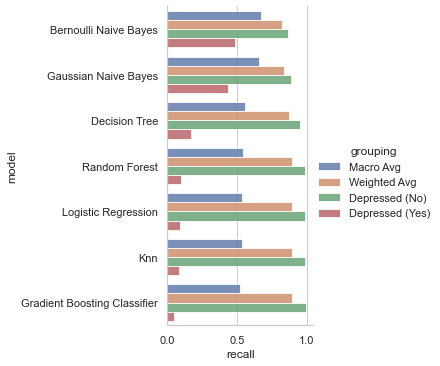

In [18]:
sns.catplot(
    data=perf_test_baseline, 
    kind="bar",
    x='recall', 
    y="model", 
    hue="grouping",
    order=list(perf_test_baseline_macro.model),
    hue_order=['Macro Avg','Weighted Avg','Depressed (No)','Depressed (Yes)'],
    alpha = 0.8
)

pass

Based on the macro average, the naive bayes's classifiers perform the best. This is because the other models do a very poor job (recall < 0.17) among the positive class (Depressed Yes) group.

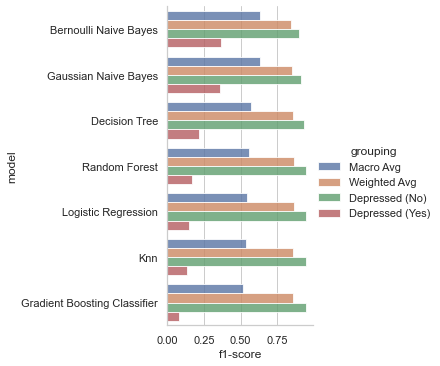

In [20]:
sns.catplot(
    data=perf_test_baseline, 
    kind="bar",
    x='f1-score', 
    y="model", 
    hue="grouping",
    order=list(perf_test_baseline_macro.model),    
    hue_order=['Macro Avg','Weighted Avg','Depressed (No)','Depressed (Yes)'],
    alpha = 0.8
)

pass

Based on our secondary evaluation criteria (F1-Score) the story remains the same. But, among the naive bayes models, the F1-score is slightly worse indicating precision is not great (see charts below). We are less concerned with this given the objective of this being a screener model. But, we will measure our ability to improve precision in addition to recall.

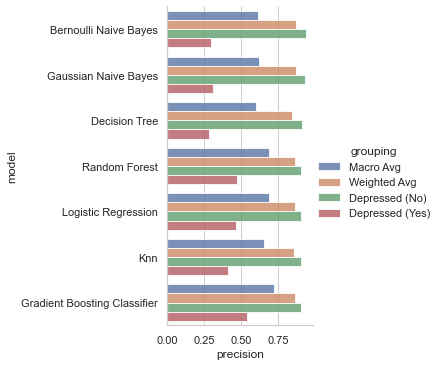

In [21]:
sns.catplot(
    data=perf_test_baseline, 
    kind="bar",
    x='precision', 
    y="model", 
    hue="grouping",
    order=list(perf_test_baseline_macro.model),    
    hue_order=['Macro Avg','Weighted Avg','Depressed (No)','Depressed (Yes)'],
    alpha = 0.8
)

pass

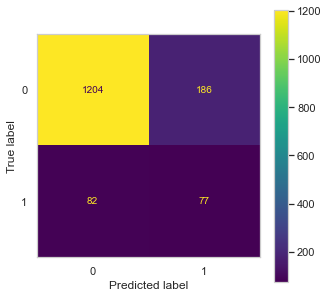

In [22]:
plot_confusion_matrix(
    y_test = predictions['actuals'], 
    pred_labels = predictions['pred_bernoulli_naive_bayes']
)

# 3) Error Analysis

- Part 1) Error analysis by feature. Here we decompose the feature distribution across cases where the model does a good & bad job. We try to get an intuition into how we can build on the model so it improves in places it previously does bad.
- Part 2) Explore predicted probabilities of naive bayes classifiers. The naive bayes appear to be the best classifier initially. We want to better understand how performance looks when the model is more confident in the prediction. This will help us further understand the types of observations it performs poorly on. 

## Part 1

We focus on understanding the distribution of our feature values in cases where the model is correct vs incorrect. We start by creating a dataset that has 1 row per test observation. We create a column that has the actual Y along with the predicted Y from the best model (Bernoulli Naive Bayes). We also append the feature variables for each record so we can gain an intuition around the distribution of feature values across each TP, TN, FP, FN.

In [85]:
pred_data_bnb = get_error_data(
    y_actuals = predictions['actuals'],
    y_predictions = predictions['pred_bernoulli_naive_bayes'],
    x_test_matrix = x_test,
    x_test_columns = dep_screener_cols,
)

pred_data_bnb.iloc[:5,:]

,y_actual,y_pred,label,little_interest_in_doing_things,feeling_down_depressed_hopeless,trouble_falling_or_staying_asleep,feeling_tired_or_having_little_energy,poor_appetitie_or_overeating,feeling_bad_about_yourself,trouble_concentrating,moving_or_speaking_to_slowly_or_fast,thoughts_you_would_be_better_off_dead,difficult_doing_daytoday_tasks
0,1,0,FN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0,0,TN,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,0,TN,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,TN,0.0,1.0,2.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0
4,0,0,TN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Below we plot a chart that shows the feature value distribution among the FN, FP, TN, & TP observrations. We start by looking at the depression screener features that had the highest correlation to target. In the chart below, the x-axis is the feature value for the observation. The y-axis represents the % of label values that have that feature. For example, in the first chart that plots "feeling_down_depressed_hopeliness" we see that approx 70% of the false negatives have feeling_down_depressed_hopeliness=0.

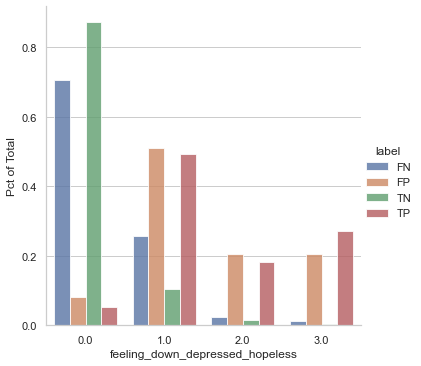

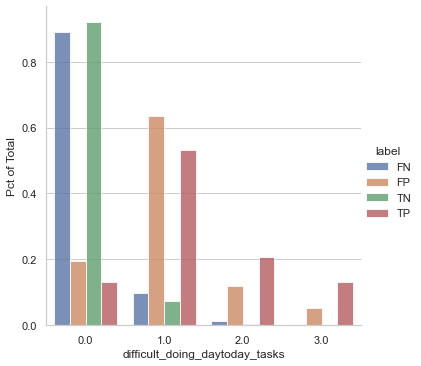

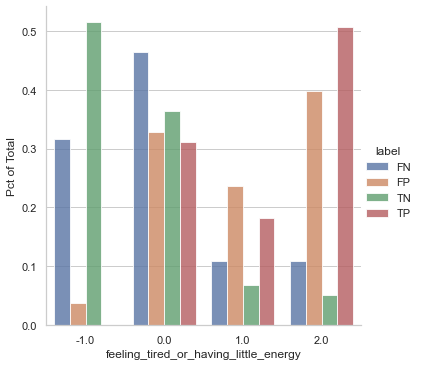

In [89]:
dep_screener_univariate = univariate_summary[univariate_summary['feature'].isin(dep_screener_cols)]
dep_screener_univariate = dep_screener_univariate[['feature','corr_abs']]

create_error_plots(
    prediction_data = pred_data_bnb,
    columns_to_plot = list(dep_screener_univariate['feature'])[:3]
)

We subsequently plot the overall distribution average across each feature column. We contextualize the column by adding a column from the eda (corr_abs) & create a feature importance from the random forest model. 

In [95]:
## ##########################
## stats by prediction label

# aggregate features by label
pred_data_bnb_summary = pred_data_bnb.groupby(['label']).mean().round(2).reset_index()

# order columns 
pred_data_bnb_summary['label'] = pd.Categorical(
    pred_data_bnb_summary['label'], 
    categories=["TP","FP","TN","FN"],
    ordered=True
)
pred_data_bnb_summary.sort_values('label', inplace=True)

# transpose so each row is a feature
pred_data_bnb_summary = pred_data_bnb_summary.T.reset_index()

## ##########################
## merge column correlation & feature importance 

dep_screener_univariate = univariate_summary[univariate_summary['feature'].isin(dep_screener_cols)]
dep_screener_univariate = dep_screener_univariate[['feature','corr_abs']]
pred_data_bnb_summary = pred_data_bnb_summary.merge(
    dep_screener_univariate, 
    left_on='index', 
    right_on='feature', 
    how = 'left'
)

# fit random forest
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train, y_train)

# Get numerical feature importances
importances = list(rf.feature_importances_)
feature_importances = pd.DataFrame({'Feature': dep_screener_cols,'Feature Importance (RF)': importances})
feature_importances = feature_importances.sort_values('Feature Importance (RF)',ascending=False)
pred_data_bnb_summary = pred_data_bnb_summary.merge(
    feature_importances, 
    left_on='index', 
    right_on='Feature', 
    how = 'left'
)


## ##########################
## sanitize

# drop duplicate column
pred_data_bnb_summary.drop(columns=['feature','Feature'], inplace=True)

## remove unneeded rows
pred_data_bnb_summary = pred_data_bnb_summary[~pred_data_bnb_summary['index'] \
                                              .isin(['y_actual','y_pred','label'])]

# # order by feature importance
pred_data_bnb_summary = pred_data_bnb_summary.sort_values(by='corr_abs',ascending=False)
pred_data_bnb_summary = pred_data_bnb_summary.rename(columns={"index": "Feature", 
                                  3: "TP",
                                  1:"FP",
                                  2:"TN",
                                  0:"FN"})

pred_data_bnb_summary

,Feature,TP,FP,TN,FN,corr_abs,Feature Importance (RF)
4,feeling_down_depressed_hopeless,1.68,1.53,0.15,0.34,0.266087,0.116370
12,difficult_doing_daytoday_tasks,1.34,1.03,0.08,0.12,0.251297,0.105663
6,feeling_tired_or_having_little_energy,1.19,0.99,-0.34,0.01,0.225408,0.104398
8,feeling_bad_about_yourself,1.32,1.17,0.09,0.1,0.220417,0.099671
9,trouble_concentrating,1.57,1.13,0.13,0.24,0.203917,0.107036
3,little_interest_in_doing_things,1.57,1.37,0.21,0.22,0.197702,0.105246
7,poor_appetitie_or_overeating,1.55,1.41,0.32,0.41,0.184182,0.116036
5,trouble_falling_or_staying_asleep,1.77,1.69,0.48,0.61,0.174241,0.113776
10,moving_or_speaking_to_slowly_or_fast,0.73,0.76,0.06,0.04,0.144270,0.088079
11,thoughts_you_would_be_better_off_dead,0.3,0.22,0.01,0.0,0.123574,0.043725


In the chart below, each row is a feature in the model. We summarize the average response for each label group. For example, we see that the avg response for "feeling_down_depressed_hopeless" among the true positives is 1.68 while it is 0.15 for the true negatives. 

**Key learnings** 
- The depression screener features are generally doing their job. The majority of the true positives are towards the high end of these columns and the majoirty of the true negatives are towards the bottom of these. 
- The depression screeners have false reads. For example, we see most of the false negatives occur when the individual replies low on these values, but is actually within the positive class. 
- Our most actionable lever is likely through feature selection to see if there are other variables that can act as a "fall back" to when these screeners show a false read.

## Part 2

We subsequently explore performance of the naive bayes model based on its confidence.

In [233]:
## ##########################
## Train a Gaussian naive bayes classsifier
gnb = GaussianNB()
gnb.fit(x_train, y_train)

## ##########################
## store the predicted probabilities of a 0 & 1 prediction
pred_prob = pd.DataFrame(gnb.predict_proba(x_test))
pred_prob.columns = ['depressed_no_prob','depressed_yes_prob']
pred_prob['y_pred'] = predictions['pred_bernoulli_naive_bayes']
pred_prob['y_actual'] = predictions['actuals']

# bin the probabilities into groups of 20%
bin_labels = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
pred_prob['depressed_yes_prob_bin'] = pd.cut(
    pred_prob['depressed_yes_prob'], 
    bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, np.inf],
    labels=bin_labels
)

# calculate prediction label
pred_prob['label'] = pred_prob.apply(label_pred, axis = 1)
pred_prob['count_FN'] = pred_prob['label'] == "FN"
pred_prob['count_TN'] = pred_prob['label'] == "TN"
pred_prob['count_FP'] = pred_prob['label'] == "FP"
pred_prob['count_TP'] = pred_prob['label'] == "TP"
pred_prob['sample_size'] = 1

# summarize observations by predicted probability
cols = ['y_pred','y_actual','count_FN','count_TN','count_FP','count_TP','sample_size']
pred_prob_summary = pred_prob.groupby(['depressed_yes_prob_bin'])[cols].sum().reset_index()
pred_prob_summary['recall'] = pred_prob_summary['count_TP'] / (pred_prob_summary['count_TP'] + pred_prob_summary['count_FN'])
pred_prob_summary['precision'] = pred_prob_summary['count_TP'] / (pred_prob_summary['count_TP'] + pred_prob_summary['count_FP'])
pred_prob_summary['sample_size (% of total)'] = pred_prob_summary['sample_size'] / pred_prob_summary['sample_size'].sum()
pred_prob_summary

,depressed_yes_prob_bin,y_pred,y_actual,count_FN,count_TN,count_FP,count_TP,sample_size,recall,precision,sample_size (% of total)
0,0.0,46,81,75,1132,40,6,1253,0.074074,0.130435,0.808909
1,0.1,9,3,2,20,8,1,31,0.333333,0.111111,0.020013
2,0.2,7,3,0,12,4,3,19,1.000000,0.428571,0.012266
3,0.3,3,2,1,6,2,1,10,0.500000,0.333333,0.006456
4,0.4,2,1,0,8,1,1,10,1.000000,0.500000,0.006456
5,0.5,8,0,0,2,8,0,10,NaN,0.000000,0.006456
6,0.6,4,2,1,3,3,1,8,0.500000,0.250000,0.005165
7,0.7,14,3,0,4,11,3,18,1.000000,0.214286,0.011620
8,0.8,14,4,0,5,10,4,19,1.000000,0.285714,0.012266
9,0.9,150,60,2,19,92,58,171,0.966667,0.386667,0.110394


In [230]:
print(f"Among the test set {round(np.mean(y_test)*100,2)}% of observations are in the positive class")

Among the test set 10.26% of observations are in the positive class


The model has better precision and recall once the predicted probability the observation is within the positive class which is good. But, 90% of the false negatives occur when the model's predicted probability of MDD=1 is less than 10%. This is where we want to focus feature selection. 

Given the learnings from the first part of the error analysis, we hypothesize many of these instances are when the observation has reported 0 across many of the depression screeners. In the table below we calculated 4 new columns;
- num_dep_screener_0 = The number of screener questions the individual responded with 0 (lowest score)
- num_dep_screener_1 = The number of screener questions the individual responded with 1
- num_dep_screener_2 = The number of screener questions the individual responded with 2
- num_dep_screener_3 = The number of screener questions the individual responded with 3 (highest score)

In [370]:
pred_prob_with_features = pd.concat([
    pred_prob, 
    # column bind test observations with their original values
    cdc_survey_pmom.iloc[idx_test][dep_screener_cols].reset_index()
], axis=1)

#pred_prob_with_features

pred_prob_with_features['num_dep_screener_0'] = (pred_prob_with_features[dep_screener_cols]==0).sum(axis=1)
pred_prob_with_features['num_dep_screener_1'] = (pred_prob_with_features[dep_screener_cols]==1).sum(axis=1)
pred_prob_with_features['num_dep_screener_2'] = (pred_prob_with_features[dep_screener_cols]==2).sum(axis=1)
pred_prob_with_features['num_dep_screener_3'] = (pred_prob_with_features[dep_screener_cols]==3).sum(axis=1)

pred_prob_with_features.groupby(['depressed_yes_prob_bin'])['sample_size'].sum().reset_index()
cols = ['num_dep_screener_0','num_dep_screener_1','num_dep_screener_2','num_dep_screener_3']

pred_prob_with_features.groupby(['depressed_yes_prob_bin'])[cols].median().reset_index()

,depressed_yes_prob_bin,num_dep_screener_0,num_dep_screener_1,num_dep_screener_2,num_dep_screener_3
0,0.0,9.0,1.0,0.0,0.0
1,0.1,6.0,2.0,1.0,1.0
2,0.2,5.0,3.0,1.0,1.0
3,0.3,5.0,2.0,1.0,1.0
4,0.4,5.5,2.0,2.0,1.0
5,0.5,3.5,4.0,2.0,0.0
6,0.6,4.5,4.0,1.0,1.0
7,0.7,4.0,4.0,1.0,1.0
8,0.8,4.0,4.0,1.0,1.0
9,0.9,2.0,2.0,2.0,3.0


In the table above we show the median value for the 4 new created columns by the predicted model probability. Notably, within the 0.0 bin group an individual, on average, **has responded 0 for at least 9 of the depression screeners**. When the predicted probability increases past 10% the average drops to 6. Hence, the model assigns a lot of value for at least one dep screener response above 0. This emphasizes that the model does poorly when the depression screeners provide a "false read" where the individual provides a 0 but they are in the positive class. This also gives us a great filter to explore additional features. For example, we will evaluate additional features correlated to outcome variable when 9+ of the screeners are answered as 0.

# 4) Feature Selection & Engineering

- Part 1: Try variables by theme separately to see how well they do in comparison
- Part 2: try depression cols + top X by theme. Top x found by either; 1) highest corr to target or 2) high corr to target when depression screener is 0
- Part 3: Try adding across multiple themes

## Part 1

In [23]:
themes = [
    'dep_screener',
    'hospital_utilization_n_access',
    'alcohol_n_smoking',
    'reproductive_health',
    'med_condition',
    'lifestyle',
    'demographic',
    'socioeconomic'
]


perf_by_theme = pd.DataFrame(columns = [
    'model',
    'grouping',
    'precision',
    'recall',
    'f1-score',
    'support',
    'accuracy',
    'theme'
])


for theme in themes:
    feature_columns = list(univariate_summary[univariate_summary['feature_theme'] == theme]['feature'])
    
    x_train, x_test, y_train, y_test = get_model_data(
        original_df = cdc_survey_pmom,
        columns = feature_columns
    )

    perf_test_theme, predictions, perf_train_theme = generate_models(
        x_train, 
        y_train, 
        x_test, 
        y_test
    )

    perf_test_theme['theme'] = theme
    perf_by_theme = pd.concat([perf_by_theme, perf_test_theme]) 

In [24]:
def create_alt_plot_theme(dataset, x_col, x_name, y_col, y_name):
    chart = alt.Chart(dataset).mark_bar().encode(
        x = alt.X(x_col, title=x_name, axis=alt.Axis(labelAngle=-45)),
        y = alt.Y(y_col, title=y_name, scale=alt.Scale(domain=[0, 1])),
        color='theme:N',
    ).facet(
        facet=alt.Facet('model')
    )
    
    return chart

In [25]:
by_theme_recall = create_alt_plot_theme(
    dataset = perf_by_theme[perf_by_theme['grouping'] == 'Macro Avg'],
    x_col = 'theme',
    x_name = 'theme',
    y_col = 'recall',
    y_name = 'recall'
)

by_theme_f1 = create_alt_plot_theme(
    dataset = perf_by_theme[perf_by_theme['grouping'] == 'Macro Avg'],
    x_col = 'theme',
    x_name = 'theme',
    y_col = 'f1-score',
    y_name = 'F1 Score'
) 

In [26]:
# TODO: Altair plot doesn't render

by_theme_recall  

alt.FacetChart(...)

In [27]:
# TODO: Altair plot doesn't render


by_theme_f1

alt.FacetChart(...)

In [28]:
perf_by_theme[perf_by_theme['grouping'] == 'Macro Avg'][['model','recall','f1-score','precision','theme']] \
      .groupby(['theme']) \
      .first() \
      .reset_index() \
      .sort_values(by='recall') \
      .rename(columns={'theme':'model features','model':'best_model'})

,model features,best_model,recall,f1-score,precision
6,reproductive_health,Decision Tree,0.515585,0.515005,0.514618
4,lifestyle,Gaussian Naive Bayes,0.537528,0.542018,0.552397
1,demographic,Gaussian Naive Bayes,0.543109,0.551601,0.586183
7,socioeconomic,Gaussian Naive Bayes,0.552079,0.556472,0.563281
0,alcohol_n_smoking,Gaussian Naive Bayes,0.571180,0.551515,0.546940
5,med_condition,Gaussian Naive Bayes,0.610796,0.573645,0.566023
3,hospital_utilization_n_access,Gaussian Naive Bayes,0.650238,0.597588,0.585828
2,dep_screener,Bernoulli Naive Bayes,0.675232,0.632390,0.614506


## Part 2

In [122]:
perf_by_theme_inc = pd.DataFrame(columns = [
    'model',
    'grouping',
    'precision',
    'recall',
    'f1-score',
    'support',
    'accuracy',
    'theme'
])

for theme in themes[1:]:
    
    # find top 20 features for that theme
    top_additional_candidates = list(univariate_summary[univariate_summary['feature_theme'] == theme].iloc[:20,:]['feature'])
    
    x_train, x_test, y_train, y_test = get_model_data(
        original_df = cdc_survey_pmom,
        columns = dep_screener_cols + top_additional_candidates
    )

    baseline_model, predictions, performance_train = generate_models(
        x_train, 
        y_train, 
        x_test, 
        y_test
    )

    baseline_model['theme'] = theme
    perf_by_theme_inc = pd.concat([perf_by_theme_inc, baseline_model])
    
# add in baseline to give context to incr benefit
perf_by_theme_inc = pd.concat([perf_by_theme_inc, perf_by_theme[(perf_by_theme['theme'] == "dep_screener")]])


# define description
def create_theme_col_desc(value):
    if value in 'dep_screener':
        return 'Baseline (dep_screener only)'
    elif value in 'alcohol_n_smoking':
        return '+ alcohol_n_smoking'
    elif value in 'med_condition':
        return '+ med_condition'
    elif value in 'lifestyle':
        return '+ lifestyle'
    elif value in 'hospital_utilization_n_access':
        return '+ hospital_utilization_n_access'
    elif value in 'socioeconomic':
        return '+ socioeconomic'
    elif value in 'reproductive_health':
        return '+ reproductive_health'
    elif value in 'demographic':
        return '+ demographic' 

perf_by_theme_inc['theme_desc'] = perf_by_theme_inc['theme'].map(create_theme_col_desc)

In [123]:
perf_by_theme_inc[perf_by_theme_inc['grouping'] == 'Macro Avg'][['model','recall','f1-score','precision','theme_desc']] \
      .groupby(['theme_desc']) \
      .first() \
      .reset_index() \
      .sort_values(by='recall') \
      .rename(columns={'ththeme_desceme':'model features','model':'best_model'})

,theme_desc,best_model,recall,f1-score,precision
5,+ reproductive_health,Bernoulli Naive Bayes,0.663640,0.622303,0.605972
0,+ alcohol_n_smoking,Bernoulli Naive Bayes,0.668850,0.624645,0.607749
3,+ lifestyle,Bernoulli Naive Bayes,0.674153,0.630484,0.612780
6,+ socioeconomic,Bernoulli Naive Bayes,0.674872,0.631753,0.613927
7,Baseline (dep_screener only),Bernoulli Naive Bayes,0.675232,0.632390,0.614506
1,+ demographic,Bernoulli Naive Bayes,0.680442,0.634656,0.616162
4,+ med_condition,Gaussian Naive Bayes,0.686360,0.624371,0.607234
2,+ hospital_utilization_n_access,Gaussian Naive Bayes,0.698220,0.630754,0.612437


## Part 3

In [31]:
cor_columns = candidate_features.copy()
cor_columns.append('MDD')

## ##########################
## Create correlation values for each method

# Option 1: corr to MDD
correlation_matrix_option1 = cdc_survey_pmom[cor_columns].corr(method='pearson')
correlation_values_abs_option1 = abs(correlation_matrix_option1['MDD']).sort_values(ascending=False)

# Option 2: find columns where top feature is 0
df_to_use = cdc_survey_pmom[(cdc_survey_pmom['feeling_down_depressed_hopeless'] == 0) & 
                (cdc_survey_pmom['poor_appetitie_or_overeating'] == 0) &
                (cdc_survey_pmom['trouble_falling_or_staying_asleep'] == 0)]
correlation_matrix_option2 = df_to_use[cor_columns].corr(method='pearson')
correlation_values_abs_option2 = abs(correlation_matrix_option2['MDD']).sort_values(ascending=False)


# Option3: find columns where 9+ dep cols are = 0
cdc_survey_pmom['num_dep_screener_0'] = (cdc_survey_pmom[dep_screener_cols]==0).sum(axis=1)
df_to_use2 = cdc_survey_pmom[cdc_survey_pmom['num_dep_screener_0'] >= 9]
correlation_matrix_option3 = df_to_use2[cor_columns].corr(method='pearson')
correlation_values_abs_option3 = abs(correlation_matrix_option3['MDD']).sort_values(ascending=False)

## ##########################
## merge into one dataframe

candidate_features_matrix = pd.DataFrame(cor_columns).rename(columns={0:'feature'})

# add option 1 
option1 = pd.DataFrame(correlation_values_abs_option1).reset_index()
option1.columns = ['feature','corr_to_mdd']

# add option 2
option2 = pd.DataFrame(correlation_values_abs_option2).reset_index()
option2.columns = ['feature','corr_to_mdd_subset_data']

# add option 3
option3 = pd.DataFrame(correlation_values_abs_option3).reset_index()
option3.columns = ['feature','corr_to_mdd_subset_data_v2']

# merge together
candidate_features_matrix = candidate_features_matrix.merge(option1, left_on='feature', right_on='feature', how='left')
candidate_features_matrix = candidate_features_matrix.merge(option2, left_on='feature', right_on='feature', how='left')
candidate_features_matrix = candidate_features_matrix.merge(option3, left_on='feature', right_on='feature', how='left')
candidate_features_matrix = candidate_features_matrix[~candidate_features_matrix['feature'] \
                    .isin(dep_screener_cols + ['MDD'])]


In [32]:
candidate_features_matrix.iloc[:5,:]

,feature,corr_to_mdd,corr_to_mdd_subset_data,corr_to_mdd_subset_data_v2
10,has_smoked_tabacco_last_5days,0.079723,0.030073,0.037979
11,alcoholic_drinks_past_12mo,0.016936,0.013302,0.004153
12,drank_alc,0.063913,0.052655,0.071602
13,alc_drinking_freq,0.016936,0.013302,0.004153
14,alc_per_day,0.025044,0.004685,0.007062


In [143]:
perf_by_additional_n_cols_matrix = pd.DataFrame(columns = [
    'model',
    'grouping',
    'precision',
    'recall',
    'f1-score',
    'support',
    'accuracy',
    'addl_cols',
    'tot_cols',
    'additional_col_method'
])

additional_col_methods = [
    'corr_to_mdd',
    'corr_to_mdd_subset_data',
    'corr_to_mdd_subset_data_v2'
]


for additional_col_method in additional_col_methods:

    print(f"Doing {additional_col_method}...")
    
    # add next top X columns 
    # try top 1 until top 30
    for i in range(1,31,1):

        # if i=1 this will add 1 column to model. 
        # additional_col_method defines how we define the top 1,2, etc... columns
        additional_features_to_use = candidate_features_matrix.sort_values(
            by = additional_col_method, ascending=False
        ).iloc[0:i,]
        additional_features_to_use = list(additional_features_to_use['feature'])

        x_train, x_test, y_train, y_test = get_model_data(
            original_df = cdc_survey_pmom,
            columns = dep_screener_cols + additional_features_to_use
        )

        perf_test, predictions, perf_train = generate_models(
            x_train, 
            y_train, 
            x_test, 
            y_test
        )

        perf_test['addl_cols'] = i
        perf_test['tot_cols'] = x_train.shape[1]
        perf_test['additional_col_method'] = additional_col_method

        perf_by_additional_n_cols_matrix = pd.concat([perf_by_additional_n_cols_matrix, perf_test])

Doing corr_to_mdd...
Doing corr_to_mdd_subset_data...
Doing corr_to_mdd_subset_data_v2...


In [144]:
perf_by_additional_n_cols_matrix = perf_by_additional_n_cols_matrix.sort_values(by = 'recall', ascending=False)

perf_by_additional_n_cols_matrix[
    perf_by_additional_n_cols_matrix['grouping'] == "Macro Avg"
].groupby(['additional_col_method']) \
.first() \
.reset_index() \
.sort_values(by = 'recall', ascending=False) \
.rename(columns={'model':'best_model'})

,additional_col_method,best_model,grouping,precision,recall,f1-score,support,accuracy,addl_cols,tot_cols
2,corr_to_mdd_subset_data_v2,Gaussian Naive Bayes,Macro Avg,0.609711,0.722461,0.623168,1549.0,0.781795,28,38
1,corr_to_mdd_subset_data,Gaussian Naive Bayes,Macro Avg,0.616888,0.715556,0.635737,1549.0,0.804390,18,28
0,corr_to_mdd,Gaussian Naive Bayes,Macro Avg,0.633965,0.710543,0.656370,1549.0,0.835378,15,25


In [145]:
perf_by_additional_n_cols_matrix[
    perf_by_additional_n_cols_matrix['grouping'] == "Depressed (Yes)"
].groupby(['additional_col_method']) \
.first() \
.reset_index() \
.sort_values(by = 'recall', ascending=False) \
.rename(columns={'model':'best_model'})

,additional_col_method,best_model,grouping,precision,recall,f1-score,support,accuracy,addl_cols,tot_cols
2,corr_to_mdd_subset_data_v2,Gaussian Naive Bayes,Depressed (Yes),0.264103,0.647799,0.375228,159.0,0.778567,30,40
1,corr_to_mdd_subset_data,Gaussian Naive Bayes,Depressed (Yes),0.262735,0.616352,0.368421,159.0,0.783086,29,39
0,corr_to_mdd,Gaussian Naive Bayes,Depressed (Yes),0.323529,0.553459,0.408353,159.0,0.835378,15,25


In [197]:
# TODO: Altair plot doesn't render

perf_subset = perf_by_additional_n_cols_matrix[
    (perf_by_additional_n_cols_matrix['grouping'] == "Macro Avg") &
    (perf_by_additional_n_cols_matrix['additional_col_method'] == "corr_to_mdd_subset_data_v2")
]


alt.Chart(perf_subset).mark_line(
       point={
         "filled": False,
         "fill": "white"
       }
).encode(
    x = alt.X('addl_cols', title="Number of Additional Cols"),
    y = alt.Y('recall', scale=alt.Scale(domain=[0, 1])),
    color = 'model'
)

alt.Chart(...)

In [154]:
candidate_features_matrix.sort_values(
    by = 'corr_to_mdd', ascending=False
).iloc[:18,]

,feature,corr_to_mdd,corr_to_mdd_subset_data,corr_to_mdd_subset_data_v2
63,seen_mental_health_professional,0.281615,0.167088,0.145780
64,count_days_seen_doctor_12mo,0.171175,0.128376,0.132099
17,times_with_12plus_alc,0.164896,0.148733,0.148559
26,arthritis,0.162268,0.118720,0.112665
58,general_health_condition,0.135315,0.007436,0.010838
59,general_health,0.135315,0.007436,0.010838
22,chest_discomfort,0.134263,0.080083,0.065163
39,dr_recommend_exercise,0.119847,0.061246,0.077160
33,respiratory_issues,0.114722,0.118922,0.044537
20,smoked_100_cigs,0.113007,0.059324,0.069866


In [165]:
# Build best models based on each method

def get_additional_features(additional_col_method, n_features):
    features = candidate_features_matrix.sort_values(
                    by = additional_col_method, ascending=False
               ).iloc[:n_features,]['feature']
    return list(features)

## ##########################
## Option 1: corr_to_mdd

additional_features_to_use_option1 = get_additional_features(
    additional_col_method = 'corr_to_mdd',
    n_features = 15
)

x_train, x_test, y_train, y_test = get_model_data(
    original_df = cdc_survey_pmom,
    columns = dep_screener_cols + additional_features_to_use_option1
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

perf_test_option1, predictions, perf_train_option1 = generate_models(
    x_train, 
    y_train, 
    x_test, 
    y_test
)

## ##########################
## Option 2: corr_to_mdd_subset_data

additional_features_to_use_option2 = get_additional_features(
    additional_col_method = 'corr_to_mdd_subset_data',
    n_features = 18
)

x_train, x_test, y_train, y_test = get_model_data(
    original_df = cdc_survey_pmom,
    columns = dep_screener_cols + additional_features_to_use_option2
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

perf_test_option2, predictions, perf_train_option2 = generate_models(
    x_train, 
    y_train, 
    x_test, 
    y_test
)

## ##########################
## Option 3: corr_to_mdd_subset_data_v2

additional_features_to_use_option3 = get_additional_features(
    additional_col_method = 'corr_to_mdd_subset_data_v2',
    n_features = 28
)

x_train, x_test, y_train, y_test = get_model_data(
    original_df = cdc_survey_pmom,
    columns = dep_screener_cols + additional_features_to_use_option3
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

perf_test_option3, predictions, perf_train_option3 = generate_models(
    x_train, 
    y_train, 
    x_test, 
    y_test
)

(6192, 25)
(1549, 25)
(6192,)
(1549,)
(6192, 28)
(1549, 28)
(6192,)
(1549,)
(6192, 38)
(1549, 38)
(6192,)
(1549,)


### Summarize Learnings

In [168]:
perf_test_option1['theme_desc'] = '+ top 15 features across any theme (V1)'
perf_test_option1['theme'] = '+ top 15 features across any theme (V1)'
perf_test_option2['theme'] = '+ top 18 features across any theme (V2)'
perf_test_option2['theme_desc'] = '+ top 18 features across any theme (V2)'
perf_test_option3['theme'] = '+ top 28 features across any theme (V3)'
perf_test_option3['theme_desc'] = '+ top 28 features across any theme (V3)'

model_change_summary = pd.concat([
    perf_by_theme_inc,
    perf_test_option1,
    perf_test_option2,
    perf_test_option3
])

In [169]:
model_change_summary[model_change_summary['grouping'] == 'Macro Avg'][['model','recall','f1-score','precision','theme_desc']] \
      .groupby(['theme_desc']) \
      .first() \
      .reset_index() \
      .sort_values(by='recall') \
      .rename(columns={'ththeme_desceme':'model features','model':'best_model'})

,theme_desc,best_model,recall,f1-score,precision
5,+ reproductive_health,Bernoulli Naive Bayes,0.663640,0.622303,0.605972
0,+ alcohol_n_smoking,Bernoulli Naive Bayes,0.668850,0.624645,0.607749
3,+ lifestyle,Bernoulli Naive Bayes,0.674153,0.630484,0.612780
6,+ socioeconomic,Bernoulli Naive Bayes,0.674872,0.631753,0.613927
10,Baseline (dep_screener only),Bernoulli Naive Bayes,0.675232,0.632390,0.614506
1,+ demographic,Bernoulli Naive Bayes,0.680442,0.634656,0.616162
4,+ med_condition,Gaussian Naive Bayes,0.686360,0.624371,0.607234
2,+ hospital_utilization_n_access,Gaussian Naive Bayes,0.698220,0.630754,0.612437
7,+ top 15 features across any theme (V1),Gaussian Naive Bayes,0.710543,0.656370,0.633965
8,+ top 18 features across any theme (V2),Gaussian Naive Bayes,0.715556,0.635737,0.616888


In [ ]:
model_change_summary[model_change_summary['grouping'] == 'Depressed (Yes)'][['model','recall','f1-score','precision','theme_desc']] \
      .groupby(['theme_desc']) \
      .first() \
      .reset_index() \
      .sort_values(by='recall') \
      .rename(columns={'ththeme_desceme':'model features','model':'best_model'})

# 5) Positive Class Imbalance

# 6) Hyperparameter Tuning

# 7) Ensemble Methods

# 8) Segmentation & Bias

# 9) Final Model

# 10) Discussion

# 11) Appendix

- **Appendix 1**: Train & test performance across different observation totals
- **Appendix 2**: Feature Engineering
- **Appendix 3**: Changing # of depression columns
- **Appendix 4**: Brute force feature selection
- **Appendix 5**: Survey performance when comparing additional years

## Appendix 1: Train & test performance across different observation totals

In [43]:
def create_alt_plot(dataset, x_col, x_name, y_col, y_name, title):
    chart = alt.Chart(dataset).mark_line(
       point={
         "filled": False,
         "fill": "white"
       }
    ).encode(
        x = alt.X(x_col, title=x_name),
        y = alt.Y(y_col, title=y_name),
        color='model:N',
    ).facet(
        facet=alt.Facet('dataset', sort=['train_set', 'test_set']),
        title=title
    )

    chart.configure_title(
        fontSize=20,
        font='Courier',
        color='gray',
        align='center'
    )
    
    return chart

In [40]:
# table to add 
perf_by_n_observations = pd.DataFrame(columns = [
    'model',
    'grouping',
    'precision',
    'recall',
    'f1-score',
    'support', 
    'accuracy', 
    'dataset',
    'n_obs',
    'train_n',
    'test_n'
])


# list of # of observations to use in initial dataset
num_obs = list(range(200,cdc_survey_pmom.shape[0], 500)) + [cdc_survey_pmom.shape[0]]

# define features 
perf_by_n_observations_features = dep_screener_cols + list(candidate_features_matrix.sort_values(
    by = 'corr_to_mdd_subset_data_v2', ascending=False
).iloc[:28,]['feature'])

for n_obs in num_obs:
    
    print(f"Doing {n_obs}...")
    
    # randomly sample 10 times per N amount (to reduce variance)
    for i in range(20):
        
        # randomly subset to N observations
        seqn = sample(list(cdc_survey_pmom['SEQN']),n_obs)
        data_to_use = cdc_survey_pmom[cdc_survey_pmom['SEQN'].isin(seqn)]

        # build models with that N
        x_train, x_test, y_train, y_test = get_model_data(
            original_df = data_to_use,
            columns = dep_screener_cols + perf_by_n_observations_features,
        )

        perf_test, predictions, perf_train = generate_models(
            x_train, 
            y_train, 
            x_test, 
            y_test
        )

        # merge test & train data performance
        perf_test['dataset'] = 'test_set'
        perf_train['dataset'] = 'train_set'   
        perf_both = pd.concat([perf_test,perf_train])
        perf_both['n_obs'] = n_obs
        perf_both['train_n'] = len(y_train)
        perf_both['test_n'] = len(y_test)

        perf_by_n_observations = pd.concat([perf_by_n_observations,perf_both])

Doing 200...
Doing 700...
Doing 1200...
Doing 1700...
Doing 2200...
Doing 2700...
Doing 3200...
Doing 3700...
Doing 4200...
Doing 4700...
Doing 5200...
Doing 5700...
Doing 6200...
Doing 6700...
Doing 7200...
Doing 7700...
Doing 7741...


In [41]:
# take avg across each train/test #
perf_by_n_obs_avg = perf_by_n_observations.groupby(['model','grouping','dataset','train_n','test_n','n_obs']) \
    .mean() \
    .reset_index()

In [44]:
perf_by_n_f1 = create_alt_plot(
    dataset = perf_by_n_obs_avg[perf_by_n_obs_avg['grouping'] == "Macro Avg"],
    x_col = 'n_obs',
    x_name = '# of Observations in Dataset',
    y_col = 'f1-score',
    y_name = 'F1-Score',
    title = 'Model Performance By Size of Dataset'
)

perf_by_n_f1

alt.FacetChart(...)

In [45]:
perf_by_n_recall = create_alt_plot(
    dataset = perf_by_n_obs_avg[perf_by_n_obs_avg['grouping'] == "Macro Avg"],
    x_col = 'n_obs',
    x_name = '# of Observations in Dataset',
    y_col = 'recall',
    y_name = 'Recall',
    title = 'Model Performance By Size of Dataset'
)

perf_by_n_recall

alt.FacetChart(...)

In [46]:
perf_by_n_obs_avg_mdd1 = perf_by_n_obs_avg[
    (perf_by_n_obs_avg['grouping'] == "Depressed (Yes)") & 
    (perf_by_n_obs_avg['support'] >= 20)
]

In [47]:
perf_by_n_f1_mdd1 = create_alt_plot(
    dataset = perf_by_n_obs_avg_mdd1,
    x_col = 'n_obs',
    x_name = '# of Observations in Dataset',
    y_col = 'f1-score',
    y_name = 'F1-score',
    title = 'Model Performance By Size of Dataset (Depressed Individuals aka Target=1)'
)

perf_by_n_f1_mdd1

alt.FacetChart(...)

In [48]:
perf_by_n_recall_mdd1 = create_alt_plot(
    dataset = perf_by_n_obs_avg_mdd1,
    x_col = 'n_obs',
    x_name = '# of Observations in Dataset',
    y_col = 'recall',
    y_name = 'Recall',
    title = 'Model Performance By Size of Dataset (Depressed Individuals aka Target=1)'
)

perf_by_n_recall_mdd1

alt.FacetChart(...)

## Appendix 2: Feature Engineering

- Part 1) Binning
- Part 2) New Variable Construction

### Part 1

In [52]:
features_to_bin = list(univariate_summary[univariate_summary['unique_values'] >= 5]['feature'])
#features_to_bin

#### Brute Force Binning

In [55]:
# create new df with bin columns from original
cdc_survey_pmom_bins = cdc_survey_pmom.copy()

###### Create bin column 

for feature in features_to_bin:

    new_column_name = feature + '_bin'

    # get non-null values per column
    feature_values = cdc_survey_pmom[feature].dropna()

    # reshape to be 1 column
    feature_values = feature_values.to_numpy().reshape([feature_values.shape[0],1])

    # create bins using estimator
    est = KBinsDiscretizer(
        n_bins=10,
        encode='ordinal', 
        strategy='uniform', 
        subsample=None
    )
    est.fit(feature_values)
    feature_values_bin = pd.DataFrame(est.transform(feature_values))

    # dataframe with binned values
    feature_values_bin.columns = [new_column_name]

    # get original
    feature_values = pd.DataFrame(feature_values)
    feature_values.columns = ['original']

    # merge bin & non-binned values together to make a lookup
    feature_values = feature_values.merge(feature_values_bin, left_index=True, right_index=True)
    feature_value_bin_lookup = feature_values.groupby(['original',new_column_name]).count().reset_index()

    # add bin column in a way that doesn't drop nulls
    cdc_survey_pmom_bins = cdc_survey_pmom_bins.merge(
        feature_value_bin_lookup, 
        left_on=feature, 
        right_on='original', 
        how = 'left'
    )

    # drop column called "original" as was only used to join
    cdc_survey_pmom_bins.drop(columns=['original'], inplace=True)  


###### create univariate bin plots and compare    
binnned_feature_names = [feature + '_bin' for feature in features_to_bin]
univariate_stats_bin, univariate_values_bin = univariate_analysis(
    df_to_use=cdc_survey_pmom_bins,
    columns=binnned_feature_names,
    show_plot=False
)

# see if it added any correlation strength

def trim_value(value):
    return value[:-4]

univariate_stats_bin['original_feature'] = univariate_stats_bin['feature'].map(trim_value)
univariate_stats_bin = univariate_stats_bin.merge(
    univariate_stats, 
    left_on='original_feature', 
    right_on='feature', 
    how = 'left')

univariate_stats_bin['corr_abs_delta'] = univariate_stats_bin['corr_abs_x'] - univariate_stats_bin['corr_abs_y']

univariate_stats_bin[['feature_x','corr_abs_x','corr_abs_y','corr_abs_delta','unique_values_x','unique_values_y']].sort_values(
    by = 'corr_abs_delta', 
    ascending=False
)

,feature_x,corr_abs_x,corr_abs_y,corr_abs_delta,unique_values_x,unique_values_y
23,count_minutes_moderate_recreational_activity_bin,0.033495,0.022947,0.010549,9,29
14,hours_worked_bin,0.046015,0.035564,0.010451,10,75
34,days_4plus_drinks_occasion_bin,0.005377,0.001035,0.004342,8,15
9,duration_last_healthcare_visit_bin,0.080523,0.077180,0.003343,5,5
10,time_since_last_healthcare_bin,0.080523,0.077180,0.003343,5,5
26,alc_drinking_freq_bin,0.019891,0.016936,0.002955,10,11
25,alcoholic_drinks_past_12mo_bin,0.019891,0.016936,0.002955,10,11
1,times_with_12plus_alc_bin,0.167509,0.164896,0.002613,9,10
28,nonhomemade_meals_bin,0.014345,0.012005,0.002340,10,22
11,age_last_period_bin,0.077121,0.075339,0.001782,10,47


#### Methodical Binning

In [ ]:
# overlap?
top_additional_features = list(candidate_features_matrix.sort_values(
    by = 'corr_to_mdd_subset_data_v2', ascending=False
).iloc[:28,]['feature'])

features_to_bin_in_model = []

for feature in features_to_bin:
    if feature in top_additional_features:
        features_to_bin_in_model.append(feature)
        
features_to_bin_in_model

In [71]:
def group_by_col(df_to_use, col):

    return df_to_use.groupby(col) \
               .agg({'MDD':'mean', 'SEQN':'count'}) \
               .reset_index() \
               .rename(columns={col:'col_value','MDD':'pct_target','SEQN':'num_responses'})

**count_days_seen_doctor_12mo**

In [58]:
print(cols[0])
group_by_col(cdc_survey_pmom,cols[0])

count_days_seen_doctor_12mo


,col_value,pct_target,num_responses
0,0.0,0.142857,14
1,1.0,0.098901,91
2,2.0,0.116564,163
3,3.0,0.121019,157
4,4.0,0.156716,268
5,5.0,0.188679,53
6,6.0,0.276596,47
7,7.0,0.000000,8
8,8.0,0.100000,10
9,9.0,0.285714,7


In [59]:
cdc_survey_pmom['count_days_seen_doctor_12mo_bin'] = pd.cut(
    cdc_survey_pmom['count_days_seen_doctor_12mo'], 
    bins=[-np.inf, 1, 2, 3, 4, 5, 6, np.inf], 
    labels=[0, 1, 2 ,3, 4, 5, 6]
)

cdc_survey_pmom.groupby('count_days_seen_doctor_12mo_bin') \
    .agg({'MDD':'mean','count_days_seen_doctor_12mo':'max','SEQN':'count'}) \
    .reset_index()

,count_days_seen_doctor_12mo_bin,MDD,count_days_seen_doctor_12mo,SEQN
0,0,0.104762,1.0,105
1,1,0.116564,2.0,163
2,2,0.121019,3.0,157
3,3,0.156716,4.0,268
4,4,0.188679,5.0,53
5,5,0.276596,6.0,47
6,6,0.300000,24.0,90


**count_minutes_moderate_sedentary_activity**

In [61]:
print(cols[1])
group_by_col(cdc_survey_pmom,cols[1])

times_with_12plus_alc


,col_value,pct_target,num_responses
0,0.0,0.150000,100
1,1.0,0.000000,3
2,2.0,0.000000,1
3,4.0,0.000000,4
4,5.0,0.000000,5
5,6.0,0.333333,3
6,7.0,0.000000,5
7,8.0,0.000000,5
8,9.0,0.000000,9
9,10.0,0.041667,24


In [62]:
cdc_survey_pmom['count_minutes_moderate_sedentary_activity_bin'] = pd.cut(
    cdc_survey_pmom['count_minutes_moderate_sedentary_activity'], 
    bins=[-np.inf, 270, 660, 840, np.inf], 
    labels=[0, 1, 2, 3]
)

cdc_survey_pmom.groupby('count_minutes_moderate_sedentary_activity_bin') \
    .agg({'MDD':'mean','count_minutes_moderate_sedentary_activity':'max','SEQN':'count'}) \
    .reset_index()

,count_minutes_moderate_sedentary_activity_bin,MDD,count_minutes_moderate_sedentary_activity,SEQN
0,0,0.074199,270.0,2372
1,1,0.112163,660.0,2746
2,2,0.145833,840.0,288
3,3,0.185185,1320.0,81


**age in years**

In [63]:
#pd.set_option('display.max_rows', 1000)
#pd.reset_option('^display.', silent=True)

print(cols[2])
group_by_col(cdc_survey_pmom,cols[2])

weight_lbs


,col_value,pct_target,num_responses
0,75.0,0.0,1
1,78.0,0.5,2
2,81.0,0.0,1
3,82.0,0.0,1
4,84.0,0.0,1
...,...,...,...
262,440.0,0.0,1
263,450.0,0.0,2
264,457.0,1.0,1
265,484.0,0.0,1


In [65]:
cdc_survey_pmom['age_in_years_bin'] = pd.cut(
    cdc_survey_pmom['age_in_years'], 
    bins=[-np.inf, 39, 49, np.inf], 
    labels=[0, 1, 2]
)

cdc_survey_pmom.groupby('age_in_years_bin') \
    .agg({'MDD':'mean','age_in_years':'max','SEQN':'count'}) \
    .reset_index()

,age_in_years_bin,MDD,age_in_years,SEQN
0,0,0.053401,39,1985
1,1,0.093137,49,1428
2,2,0.118530,80,4328


**times_with_12plus_alc**

**weight_lbs**

**duration_last_healthcare_visit**

**time_since_last_healthcare**

**times_with_8plus_alc**

### Does binning help?

In [ ]:
top_additional_features_bin = []

for feature in top_additional_features:
    if feature in features_to_bin_in_model:
        feature_name = feature + '_bin'
    else:
        feature_name = feature
    
    top_additional_features_bin.append(feature_name)

NameError: name 'top_additional_features_bin' is not defined

In [ ]:
x_train, x_test, y_train, y_test = get_model_data(
    original_df = cdc_survey_pmom,
    columns = dep_screener_cols + top_additional_candidates_bin
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

perf_test_bin, predictions, perf_train_bin = generate_models(
    x_train, 
    y_train, 
    x_test, 
    y_test
)

perf_test_bin = perf_test_bin[perf_test_bin['grouping'] == 'Macro Avg']
perf_test_bin[['model','recall','f1-score','precision','accuracy']]

**others**

In [ ]:
cdc_survey_pmom['weight_lbs_over_height_in_ratio'] = cdc_survey_pmom['weight_lbs'] / cdc_survey_pmom['height_in']

In [67]:
cdc_survey_pmom['num_dep_screener_0'] = (cdc_survey_pmom[dep_screener_cols]==0).sum(axis=1)
cdc_survey_pmom['num_dep_screener_1'] = (cdc_survey_pmom[dep_screener_cols]==1).sum(axis=1)
cdc_survey_pmom['num_dep_screener_2'] = (cdc_survey_pmom[dep_screener_cols]==2).sum(axis=1)
cdc_survey_pmom['num_dep_screener_3'] = (cdc_survey_pmom[dep_screener_cols]==3).sum(axis=1)
cdc_survey_pmom['num_dep_screener_0_bin'] = pd.cut(
    cdc_survey_pmom['num_dep_screener_0'], 
    bins=[-np.inf, 0, 1, 4, np.inf], 
    labels=[0, 1, 2 ,3]
)

## Appendix 3: Changing # of depression columns

## Appendix 4: Brute force feature selection

## Appendix 5: Survey performance when comparing additional years

## Graveyard

In [211]:
# pred_prob_results = pd.DataFrame(columns=['bin','grouping','recall','f1-score','support','accuracy'])

# for bin_label in bin_labels:
#     data_to_use = pred_prob[pred_prob['depressed_yes_prob_bin'] == bin_label]
#     bin_performance = get_performance_df(
#         data_to_use['y_actual'], 
#         data_to_use['y_pred'],
#         str(bin_label))
#     bin_performance.rename(columns={'model':'bin'}, inplace=True)
#     pred_prob_results = pd.concat([pred_prob_results,bin_performance])

# alt.Chart(pred_prob_results).mark_line(
#        point={
#          "filled": False,
#          "fill": "white"
#        }
# ).encode(
#     x = alt.X('bin', title="Prob(MDD=1)"),
#     y = alt.Y('recall', scale=alt.Scale(domain=[0, 1])),
# ).facet(
#     facet=alt.Facet('grouping')
# )